 # 201758101 배성규 

### 빅데이터 과제4 , Classfication

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('HW4.csv', sep=';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
BankData = df.loc[:, ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]

1) 파일을 읽어 데이터프레임을 생성한 후, 분석에 적절하지 않은 day와 month 칼럼은 삭제하시오. 수치형 특성의 이름과 범주형 특성의 이름의 리스트를 출력하시오.

In [6]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB


In [7]:
cat_feat = [name for name in BankData if BankData[name].dtype == 'object' if name !='y'] # 범주형 카테고리 추출
cat_feat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [8]:
num_feat = [name for name in BankData if name not in cat_feat] # 수치형 카테고리 추출
num_feat

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']

---------------------------------------------------------------
2) 레이블의 범주별 비율을 구하시오

In [39]:
BankData.groupby('y')['y'].count()

y
no     4000
yes     521
Name: y, dtype: int64

---
3) 수치형 특성의 요약통계(평균, 표준편차 등)와 범주형 특성의 막대 그래프를 구하시오.

In [ ]:
BankData.describe()

In [ ]:
counts = BankData.job.value_counts()
plt.bar(counts.index, counts.values)
plt.title('job')
plt.subplots_adjust(right = 2.5 )

Text(0.5, 1.0, 'marital')

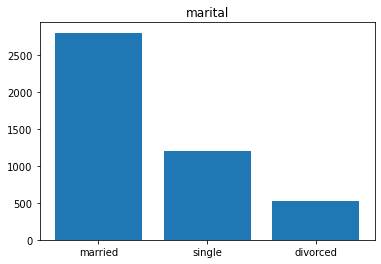

In [10]:
counts = BankData.marital.value_counts()
plt.bar(counts.index, counts.values)
plt.title('marital')

Text(0.5, 1.0, 'education')

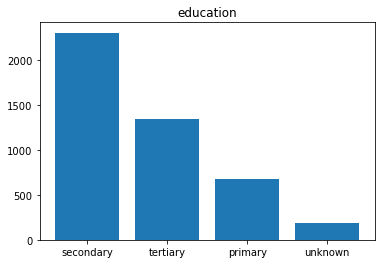

In [11]:
counts = BankData.education.value_counts()
plt.bar(counts.index, counts.values)
plt.title('education')

Text(0.5, 1.0, 'default')

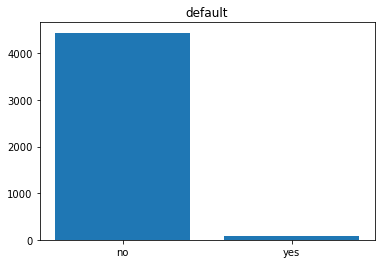

In [12]:
counts = BankData.default.value_counts()
plt.bar(counts.index, counts.values)
plt.title('default')

Text(0.5, 1.0, 'housing')

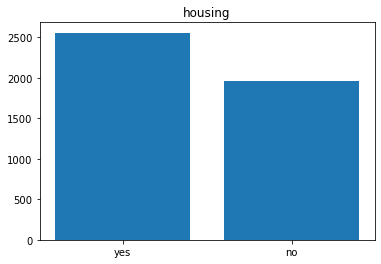

In [13]:
counts = BankData.housing.value_counts()
plt.bar(counts.index, counts.values)
plt.title('housing')

Text(0.5, 1.0, 'loan')

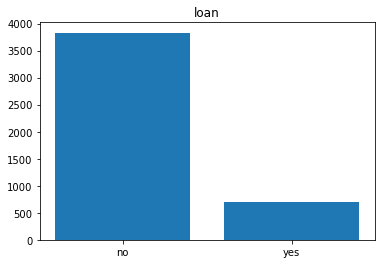

In [14]:
counts = BankData.loan.value_counts()
plt.bar(counts.index, counts.values)
plt.title('loan')

Text(0.5, 1.0, 'contact')

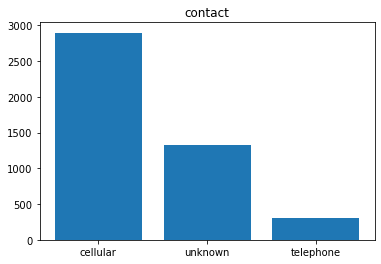

In [15]:
counts = BankData.contact.value_counts()
plt.bar(counts.index, counts.values)
plt.title('contact')

Text(0.5, 1.0, 'poutcome')

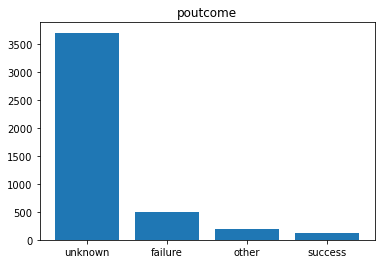

In [16]:
counts = BankData.poutcome.value_counts()
plt.bar(counts.index, counts.values)
plt.title('poutcome')

4) 특성행렬을 만든 후 범주형 특성은 원-핫-인코딩한 데이터프레임(4521rows×38columns)을 구하시오. 그리고 레이블에 대하여 'yes'는 0으로 'no'는 1로 인코딩하시오.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:

X = BankData.drop('y', axis = 1)

In [19]:
y = BankData['y']

In [20]:
X = pd.get_dummies(X)

In [21]:
X

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1
4517,57,-3313,153,1,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4518,57,295,151,11,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4519,28,1137,129,4,211,3,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [22]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
label_encoder.classes_
y = label_encoder.transform(y)

In [23]:
y

array([0, 0, 0, ..., 0, 0, 0])

5) 데이터를 훈련용과 테스트용으로 8:2로 분할한 후, 표준화하시오

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 0, stratify = y)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [29]:
print(X_train_std)

[[-1.61616572 -0.38959816 -0.21965914 ... -0.21375489 -0.17037239
  -2.13014533]
 [-1.33213362 -0.57420619 -0.49060114 ... -0.21375489 -0.17037239
   0.46945154]
 [-0.38535993 -0.44615438  0.8526606  ... -0.21375489 -0.17037239
   0.46945154]
 ...
 [-0.57471467 -0.45718106  1.26098164 ... -0.21375489 -0.17037239
   0.46945154]
 [ 0.27738165 -0.38568546 -0.2540039  ... -0.21375489 -0.17037239
  -2.13014533]
 [ 1.50818744 -0.43583909 -0.33032559 ... -0.21375489 -0.17037239
  -2.13014533]]


In [30]:
print(X_test_std)

[[-0.00665046  1.59662777 -0.32269342 ... -0.21375489 -0.17037239
   0.46945154]
 [ 0.56141375 -0.05737484 -0.66995711 ...  4.67825565 -0.17037239
  -2.13014533]
 [ 0.94012323  1.3003301  -0.73101446 ... -0.21375489 -0.17037239
   0.46945154]
 ...
 [-0.95342414 -0.34513572 -0.66232494 ... -0.21375489 -0.17037239
   0.46945154]
 [-0.10132783 -0.4959523  -0.7958879  ... -0.21375489 -0.17037239
   0.46945154]
 [-0.10132783  0.00771817 -0.21584306 ... -0.21375489 -0.17037239
   0.46945154]]


6) cross_val_score 함수(cv=5)를 사용하여 로지스틱 회귀의 초모수 C의 값을 [0.01, 0.1, 1, 10, 100]로 바꾸어 가며 최적값을 구한 후, 이 값을 사용한 테스트 스코어를 구하시오. 테스트 데이터에 대한 정오분류표를 작성하고 정기예금에 가입하지 않은 고객의 정밀도와 재현율을 구한 후 그 의미를 기술하시오.

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [50]:
c_list = [0.01,0.1,1,10,100]
best_score = 0

for i in c_list:
    logistic = LogisticRegression(C=i)
    scores = cross_val_score(logistic,X_train_std,y_train,cv=5)
    print(np.mean(scores))
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_param = { 'C' : i }


0.8979535850469575
0.9004413012081336
0.9007175443020564
0.9007171622230883
0.9007171622230883


In [51]:
print(best_score)
print(best_param)

0.9007175443020564
{'C': 1}


In [52]:
log2 = LogisticRegression(**best_param)
log2.fit(X_train_std, y_train)
log2.score(X_test_std, y_test)

0.901657458563536

In [54]:
pred_test = log2.predict(X_test_std)
y_pred = log2.predict(X_test_std)
print(confusion_matrix(y_test, y_pred))

[[786  15]
 [ 74  30]]


 정밀도 : 786 / (786+74) = 0.91395..
 재현율 : 786 / (786+15) = 0.98127...

7) GridSearchCV(cv=5)를 사용하여 결정트리의 최적 최대 깊이(1~10)를 구하고, 이 값을 사용한 테스트 스코어를 구하시오.

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'max_depth' : range(1,11)}
gscv = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 1),
                   param_grid = param_grid,
                   scoring = 'accuracy', cv = 5, n_jobs = -1)

In [36]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(1, 11)}, scoring='accuracy')

In [37]:
print(gscv.best_score_)

0.8940812147054553


In [38]:
print(gscv.best_params_)

{'max_depth': 4}


In [55]:
tree2 = DecisionTreeClassifier(**gscv.best_params_, random_state = 1)
tree2.fit(X_train, y_train)
tree2.score(X_test, y_test)

0.8928176795580111

8) StandardScaler, PCA(n_componetns=5), SVC(kernel='rbf')를 순서대로 연결한 파이프라인을 생성한 후, C와 gamma의 값들을 [0.01, 0.1, 1, 10, 100]으로 바꾸면서 GridSearchCV(cv=5)를 사용하여 최적 C와 gamma를 구하시오. 이 모형의 테스트 스코어는 얼마인가?

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [73]:
pipe_line = make_pipeline(StandardScaler(), PCA(n_components=5),SVC(kernel='rbf'))
param_grid = {'svc__C':c_list, 'svc__gamma':c_list}


In [74]:
gs = GridSearchCV(estimator=pipe_line, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)